In [ ]:
# importare le varie librerie

import pandas as pd
import numpy as np
import os

from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator


In [ ]:
dir_base= 'drive/My Drive/Colab Notebooks'
train_dir= dir_base + '/train'
test_dir= dir_base + '/test'

In [ ]:
categories= []
n_train= []
n_test= []

for num in os.listdir(train_dir):
    categories.append(num)
    
    train_img= os.listdir(train_dir + '/' + num)
    test_img= os.listdir(test_dir + '/' + num)
    
    n_train.append(len(train_img))
    n_test.append(len(test_img))
    
airlines= pd.DataFrame({'category': categories, 'n_train': n_train, 'n_test': n_test})
airlines.sort_values('n_train', ascending=False, inplace=True)
airlines[:10]

,category,n_train,n_test
8,aerflot,109,27
2,klm,107,30
4,aer lingus,105,24
6,air italy,105,30
5,air berlin,100,24
1,air canada,97,27
7,etihad,89,25
3,iberia,85,20
0,air france,84,24


In [ ]:
training_datagen= ImageDataGenerator(rescale= 1./255,
                                     rotation_range= 45,
                                     horizontal_flip= True,
                                     zoom_range= 0.2,
                                     shear_range= 0.2,
                                     fill_mode= 'nearest')

validation_datagen= ImageDataGenerator(rescale= 1./255)


In [ ]:
train_generator= training_datagen.flow_from_directory(train_dir,
                                                      target_size= (224,224),
                                                      shuffle= True,
                                                      class_mode='categorical',
                                                      batch_size= 32)

val_generator= validation_datagen.flow_from_directory(test_dir,
                                                      target_size= (224,224),
                                                      class_mode= 'categorical',
                                                      batch_size= 32)

Found 881 images belonging to 9 classes.
Found 231 images belonging to 9 classes.


In [ ]:
# visualize training and val images, labels shape
train_images, train_labels= next(train_generator)
val_images, val_labels= next(val_generator)
print(val_images.shape)
print(val_labels.shape)
print(train_images.shape)
print(train_labels.shape)



(32, 224, 224, 3)
(32, 9)
(32, 224, 224, 3)
(32, 9)


In [ ]:
# plot images
def plot_images(image):
  fig, axis= plt.subplots(1, 5, figsize=(20,20))
  axis= axis.flatten()
  for img, ax in zip(image, axis):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

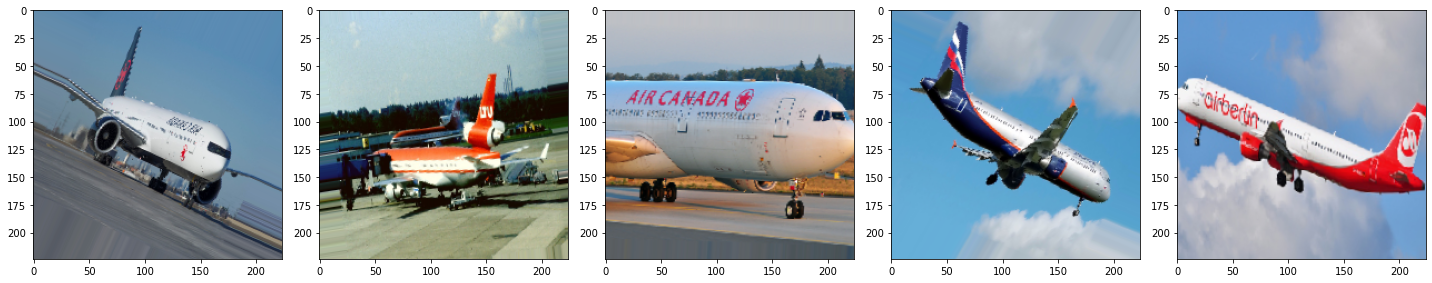

In [ ]:
plot_images(train_images[:5])

In [ ]:
# transfer learning
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

local_file_weights= 'drive/My Drive/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

base_model= InceptionV3(input_shape=(224,224,3),
                        include_top= False,
                        weights= None)

x= base_model.output
x= layers.Flatten()(x)
x= layers.Dense(1024, activation='relu')(x)
x= layers.Dropout(0.2)(x)
x= layers.Dense(9, activation= 'softmax')(x)

model= Model(inputs= base_model.inputs,
             outputs= x)

for layer in base_model.layers:
  layer.trainable= False

model.compile(optimizer= 'rmsprop',
              loss= 'categorical_crossentropy',
              metrics= ['accuracy'])





In [ ]:
history= model.fit(train_generator,
                   validation_data= val_generator,
                   epochs= 30,
                   steps_per_epoch= len(train_images),
                   verbose= 2)

Epoch 1/30


KeyboardInterrupt: ignored

# Nuova sezione